In [1]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.layers import BatchNormalization
from __future__ import absolute_import , division, print_function
from tensorflow.keras.layers import Flatten
from tensorflow.keras import Sequential
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
import cv2
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import itertools
%matplotlib inline
IMAGE_SIZE = 96
IMAGE_CHANNELS = 3
SAMPLE_SIZE = 80000

['train', 'test', 'train_labels.csv', 'sample_submission.csv']


In [2]:
os.listdir('../input')

['train', 'test', 'train_labels.csv', 'sample_submission.csv']

In [3]:
print(len(os.listdir('../input/train')))
print(len(os.listdir('../input/test')))

220025
57458


Let me read the data into a dataframe

In [4]:
train_data  = pd.read_csv('../input/train_labels.csv')
print(train_data.shape)

(220025, 2)


In [5]:
train_data['label'].value_counts()

0    130908
1     89117
Name: label, dtype: int64

(96, 96, 3)


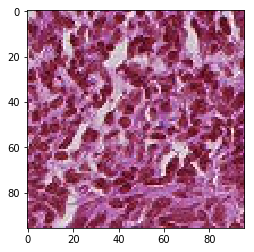

In [6]:
#Image location is available
IMAGE_LOCATION = '../input/train/'
# #reading images
file = IMAGE_LOCATION + train_data['id'].iloc[1002] + '.tif'
im = cv2.imread(file)
print(im.shape)
plt.imshow(im)
plt.show()
def draw_category_images(col_name,figure_cols, df, IMAGE_PATH):
    categories = (df.groupby([col_name])[col_name].nunique()).index
    f, ax = plt.subplots(nrows=len(categories),ncols=figure_cols, 
                             figsize=(4*figure_cols,4*len(categories))) # adjust size here
        # draw a number of images for each location
    for i, cat in enumerate(categories):
        sample = df[df[col_name]==cat].sample(figure_cols) # figure_cols is also the sample size
        for j in range(0,figure_cols):
            file=IMAGE_PATH + sample.iloc[j]['id'] + '.tif'
            im=cv2.imread(file)
            print(im.shape)
            ax[i, j].imshow(im, resample=True, cmap='gray')
            ax[i, j].set_title(cat, fontsize=16)  
    plt.tight_layout()
    plt.show()

def get_me_data(IMAGE_LOCATION, train_data):
    build_data = []
    train_id = train_data['id'].tolist()
    for i in range(len(train_id)):
        file = IMAGE_LOCATION + train_id[i] + '.tif'
        build_data.append(cv2.imread(file))
    return(build_data)
train_images = get_me_data(IMAGE_LOCATION, train_data)
train_label = train_data['label'].tolist()
# draw_category_images('label', 4, train_data, IMAGE_LOCATION)

In [7]:
(130908)/(130908+89117)

0.5949687535507329

In [8]:
model = Sequential([
    Flatten(input_shape=(96, 96, 3)),
    Dense(512, activation=tf.nn.relu),
    Dense(128, activation=tf.nn.relu),
    Dense(1, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(train_images, train_label, epochs=10, batch_size=512)

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 220025 arrays: [array([[[244, 246, 246],
        [245, 247, 247],
        [246, 248, 249],
        ...,
        [244, 246, 247],
        [244, 246, 247],
        [244, 246, 247]],

       [[241, 243, 243],
        [...